In [121]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [122]:
!ls drive/My\ Drive/CS498/HW4

 cifar-10-batches-py	  More_PCA_1.0.ipynb    partc_distances.csv
 cifar-10-python.tar.gz  'More PCA.ipynb'
 HW3.ipynb（副本）	  partb_distances.csv


In [0]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
import pickle
import pandas as pd
from sklearn.metrics import mean_squared_error as ms
from sklearn.metrics import euclidean_distances 
import math

In [0]:
def load_CIFAR_batch(filename):
    with open(filename, 'rb') as f:
        datadict = pickle.load(f,encoding='latin1')
        X = datadict['data']
        Y = datadict['labels']
        X = X.reshape(10000, 3, 32,32).transpose(0,2,3,1).astype("float")
        Y = np.array(Y)
    return X, Y

In [0]:
X1, Y1 = load_CIFAR_batch('drive/My Drive/CS498/HW4/cifar-10-batches-py/data_batch_1')
X2, Y2 = load_CIFAR_batch('drive/My Drive/CS498/HW4/cifar-10-batches-py/data_batch_2')
X3, Y3 = load_CIFAR_batch('drive/My Drive/CS498/HW4/cifar-10-batches-py/data_batch_3')
X4, Y4 = load_CIFAR_batch('drive/My Drive/CS498/HW4/cifar-10-batches-py/data_batch_4')
X5, Y5 = load_CIFAR_batch('drive/My Drive/CS498/HW4/cifar-10-batches-py/data_batch_5')
T1, T2 = load_CIFAR_batch('drive/My Drive/CS498/HW4/cifar-10-batches-py/test_batch')

In [24]:
X1.shape

(10000, 32, 32, 3)

In [0]:
Train = np.vstack((X1,X2,X3,X4,X5))
Class_train = np.hstack((Y1,Y2,Y3,Y4,Y5))
train = Train.reshape(Train.shape[0],-1)
test = T1.reshape(T1.shape[0],-1)

In [0]:
Image = np.vstack((train, test))
Class = np.hstack((Class_train,T2))

In [0]:
df1 = pd.DataFrame(Image)
df2 = pd.DataFrame(Class)
df = pd.concat([df1, df2], axis=1,ignore_index=True)

In [0]:
df_0 = df[df[3072]==0].drop([3072],axis=1,inplace=False)
df_1 = df[df[3072]==1].drop([3072],axis=1,inplace=False)
df_2 = df[df[3072]==2].drop([3072],axis=1,inplace=False)
df_3 = df[df[3072]==3].drop([3072],axis=1,inplace=False)
df_4 = df[df[3072]==4].drop([3072],axis=1,inplace=False)
df_5 = df[df[3072]==5].drop([3072],axis=1,inplace=False)
df_6 = df[df[3072]==6].drop([3072],axis=1,inplace=False)
df_7 = df[df[3072]==7].drop([3072],axis=1,inplace=False)
df_8 = df[df[3072]==8].drop([3072],axis=1,inplace=False)
df_9 = df[df[3072]==9].drop([3072],axis=1,inplace=False)

In [0]:
mean_0 = df_0.mean()
mean_1 = df_1.mean()
mean_2 = df_2.mean()
mean_3 = df_3.mean()
mean_4 = df_4.mean()
mean_5 = df_5.mean()
mean_6 = df_6.mean()
mean_7 = df_7.mean()
mean_8 = df_8.mean()
mean_9 = df_9.mean()

In [0]:
Mean_list = []
Mean_list.append(mean_0)
Mean_list.append(mean_1)
Mean_list.append(mean_2)
Mean_list.append(mean_3)
Mean_list.append(mean_4)
Mean_list.append(mean_5)
Mean_list.append(mean_6)
Mean_list.append(mean_7)
Mean_list.append(mean_8)
Mean_list.append(mean_9)

In [0]:
M = np.asarray(Mean_list)
N = []
for i in range(10):
    N.append(M[i].reshape(32,32,3))

In [15]:
N[0].shape

(32, 32, 3)

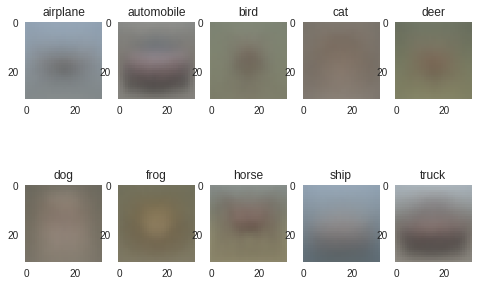

In [37]:
name_list = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
for i in range(10):
  plt.subplot(2,5,i+1)
  plt.title(name_list[i])
  plt.grid(False)
  plt.imshow(N[i]/255, cmap = plt.cm.bone)


In [0]:
def train(training_file, para_file, n_PCs):  
  # Number of PC
    pca = PCA(n_components = n_PCs)
    # Train PCA model
    model = pca.fit(para_file)
    # Apply transformatio to target dataset
    data_trained = model.transform(training_file)
    # Project back to original size
    inverse_back = model.inverse_transform(data_trained)
    return inverse_back

In [0]:
def evaluate(transformed_data, true_data):
    return ms(transformed_data, true_data,multioutput = 'raw_values').sum()

In [0]:
def plot():  
    error_list = []
    name_list = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
    for datafile in [df_0,df_1,df_2,df_3,df_4,df_5,df_6,df_7,df_8,df_9]:
        transformed_data = train(datafile,datafile,20)
        error = evaluate(transformed_data,np.asarray(datafile))
        error_list.append(error)
    plt.bar(range(len(error_list)), error_list,tick_label=name_list)
    plt.show()

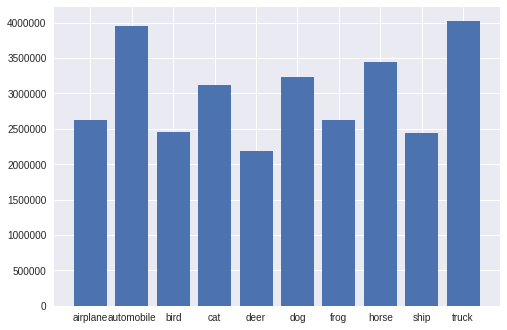

In [0]:
plot()

In [0]:
def DistanceMat():
    l = []
    Mean_0 = np.asarray(mean_0)
    Mean_1 = np.asarray(mean_1)
    Mean_2 = np.asarray(mean_2)
    Mean_3 = np.asarray(mean_3)
    Mean_4 = np.asarray(mean_4)
    Mean_5 = np.asarray(mean_5)
    Mean_6 = np.asarray(mean_6)
    Mean_7 = np.asarray(mean_7)
    Mean_8 = np.asarray(mean_8)
    Mean_9 = np.asarray(mean_9)
    l.append(Mean_0)
    l.append(Mean_1)
    l.append(Mean_2)
    l.append(Mean_3)
    l.append(Mean_4)
    l.append(Mean_5)
    l.append(Mean_6)
    l.append(Mean_7)
    l.append(Mean_8)
    l.append(Mean_9)
    l = np.asarray(l)
    DisMat = euclidean_distances(l,l)
    DisMatrix = np.matrix(DisMat**2)
    return DisMatrix

In [0]:
DisMat = DistanceMat()

In [0]:
np.savetxt('drive/My Drive/CS498/HW4/partb_distances.csv', DisMat, delimiter = ',',fmt='%.6f')

In [0]:
def MSD(DisMat):
    name_list = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
    a_1 = np.full((10,1),1)
    a_1 = np.matrix(a_1)
    A = (np.matrix(np.identity(10)) - 0.1*np.dot(a_1,a_1.T))
    W = (-1/2)*A@DisMat@A.T
    lamda,U = np.linalg.eig(W)
    a, b = np.argsort(-lamda)[0:2]
    lamda_s = np.array([math.sqrt(lamda[a]),math.sqrt(lamda[b])])
    lamda_vector = np.matrix(np.diagflat(lamda_s))
    U_s = U[:,a:(b+1)]
    Y = np.dot(U_s, lamda_vector)
    plt.scatter(np.asarray(Y[:,0]),np.asarray(Y[:,1]))
    for i in range(10):
      plt.text(Y[i,0]-5, Y[i,1]+5, name_list[i] , fontsize=9)
    plt.show()

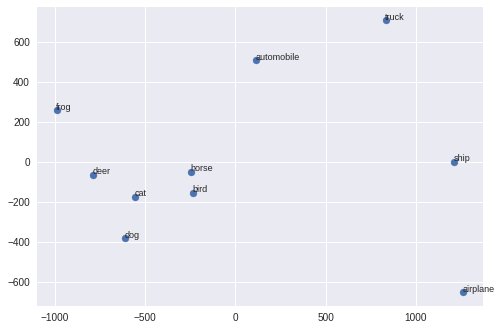

In [0]:
MSD(DisMat)

In [0]:
df_list = []
df_list.append(df_0)
df_list.append(df_1)
df_list.append(df_2)
df_list.append(df_3)
df_list.append(df_4)
df_list.append(df_5)
df_list.append(df_6)
df_list.append(df_7)
df_list.append(df_8)
df_list.append(df_9)

In [0]:
def trainPart3(training_file, para_file, n_PCs):  
  # Number of PC
    pcaa = PCA(n_components = n_PCs)
    pcab = PCA(n_components = n_PCs)
    # Train PCA model
    model_a = pcaa.fit(training_file)
    model_b = pcab.fit(para_file)
    
    model_a.components_ = model_b.components_
    # Apply transformatio to target dataset
    data_trained = model_a.transform(training_file)
    # Project back to original size
    inverse_back = model_a.inverse_transform(data_trained)
    return inverse_back

In [0]:
def E(a,b,df_list,Mean_list):
    mean1 = Mean_list[a]
    mean2 = Mean_list[b]
    a_evaluate = trainPart3(df_list[a],df_list[b],20)
#     for i in range(len(a_evaluate)):
#         a_evaluate[i] = a_evaluate[i] - mean2 + mean1
    e = evaluate(a_evaluate,np.asarray(df_list[a]))
    return e

In [0]:
def E_atob(a,b,df_list,Mean_list):
    e_atob = 0.5*(E(a,b,df_list,Mean_list)+E(b,a,df_list,Mean_list))
    return e_atob

In [0]:
D = np.empty([10,10])
for i in range(10):
    for j in range(i,10):
        D[i,j] = E_atob(i,j,df_list,Mean_list)
        D[j,i] = D[i,j]

In [0]:
D.shape

(10, 10)

In [0]:
np.savetxt('drive/My Drive/CS498/HW4/partc_distances.csv', np.matrix(D) , delimiter = ',',fmt='%.6f')

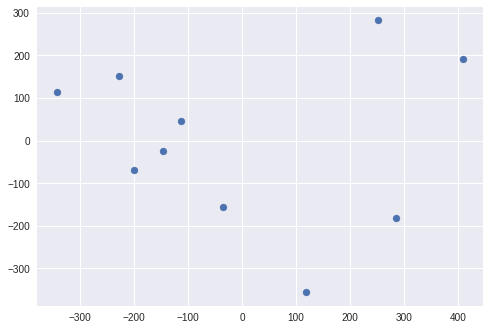

In [0]:
MSD(D)

In [0]:
D

array([[2620520.89631123, 3723533.72590458, 2794269.96920178,
        3307064.11496125, 2554821.50459998, 3399770.53907152,
        2950335.11592902, 3394879.62190657, 2715785.79786191,
        3793748.32269339],
       [3723533.72590458, 3950715.0338079 , 3699934.83955394,
        4038872.88945153, 3451017.4406637 , 4211810.02194678,
        3685598.67278473, 4230246.07245732, 3489146.62612753,
        4135245.15469328],
       [2794269.96920178, 3699934.83955394, 2447707.43040686,
        2939289.4822337 , 2423793.76662077, 2967286.7562781 ,
        2685793.10080422, 3200128.96171422, 2813323.73242146,
        3635329.48901456],
       [3307064.11496125, 4038872.88945153, 2939289.4822337 ,
        3116491.62854508, 2889711.66284078, 3262809.40818101,
        3028678.52575443, 3546256.19237119, 3202095.01215956,
        3897461.17677734],
       [2554821.50459998, 3451017.4406637 , 2423793.76662077,
        2889711.66284078, 2180392.23345817, 2955121.26636522,
        2553750.73196007